<figure>
  <IMG SRC="gfx/Logo_norsk_pos.png" WIDTH=100 ALIGN="right">
</figure>

# Particle in a two-dimensional box
*Roberto Di Remigio*, *Luca Frediani*

After discussing and experimenting with the one-dimensional particle in a box model, we now move on to the two-dimensional case. The particle is now confined into a two-dimensional box with sides $L_x$ and $L_y$ long by the appropriate potential energy operator:

\begin{equation}
V(x, y) =
\begin{cases}
0 \quad\quad \text{if} \,\, 0\leq x \leq L_x \,\, \text{and} \,\, 0 \leq y \leq L_y \\
+\infty \quad\quad \text{otherwise}
\end{cases}
\end{equation}

Notice that $L_x$ can differ from $L_y$. In the general case, the particle can be confined inside
a rectangular well. The geometry of the potential will determine the properties of the solutions.

How does the quantum particle behave? We need to find the **eigenfunctions** and **eigenvalues** of the **Hamiltonian operator**, that is we have to solve the following ordinary differential equation:
\begin{equation}
-\frac{\hbar^2}{2m}\left(\frac{\mathrm{\partial}^2}{\mathrm{\partial}x^2} 
+ \frac{\mathrm{\partial}^2}{\mathrm{\partial}y^2}\right)
\psi_{nm}(x,y) = E_{nm}\psi_{nm}(x,y)
\end{equation}
with **boundary conditions**:
\begin{equation}
\begin{aligned}
  \psi_{nm}(0, y) &= 0 \\
  \psi_{nm}(L_x, y) &= 0
\end{aligned}
\end{equation}
and:
\begin{equation}
\begin{aligned}
  \psi_{nm}(x, 0) &= 0 \\
  \psi_{nm}(x, L_y) &= 0
\end{aligned}
\end{equation}
You will notice that, not only the eigenfunctions now depend on two **degrees of freedom** (the $x$ and $y$ coordinates) but they also carry **two** quantum numbers $n$ and $m$.

Given that the kinetic energy operator is **separable**, an acceptable form for the solutions is
the product of one-dimensional states:
\begin{equation}
\psi_{nm}(x, y) = \psi_{n}(x)\psi_{m}(y)
\end{equation}
that is, states that are eigenfunctions of the one-dimensional particle in a box problem.
A more explicit form is:

\begin{equation}
\psi_{nm}(x, y) = \sqrt{\frac{2}{L_x}}\sin\left(\frac{n\pi x}{L_x}\right) 
\sqrt{\frac{2}{L_y}}\sin\left(\frac{m\pi y}{L_y}\right) \quad \forall n, m \neq 0
\end{equation}

We can then derive the form of the eigenvalues by inserting this form of the wavefunction into the Schrödinger equation:
\begin{equation}
E_{nm} = \frac{h^2}{8M}\left(\frac{n^2}{L_x^2} + \frac{m^2}{L_y^2} \right)
\end{equation}
Of course, if the box is square the expression for the eigenvalues would simplify to:
\begin{equation}
E_{nm} = \frac{h^2}{8ML^2}\left(n^2 + m^2\right) \quad \forall n, m\neq 0
\end{equation}

## Exercise 1: Normalization

The one-dimensional eigenfunctions $\psi_n(x)$ and $\psi_m(y)$ are orthonormal. What about the two-dimensional eigenfunctions $\psi_{nm}$? Are they orthogonal? Are they normalized?
Given a linear combination of two-dimensional normalized, eigenfunctions, is it still normalized? That is,
is 
\begin{equation}
\Psi(x, y) = \psi_{11}(x, y) + \psi_{21}(x, y)
\end{equation}
normalized? If not, find the normalization constant.

Define also a function to calculate the value of the two-dimensional eigenfunctions on a grid of points. We will use this function to plot the eigenfunctions.
The function should take the following arguments: the quantum numbers $n$ and $m$, the box lengths $L_x$ and $L_y$, the NumPy arrays with $x$ and $y$ values:

```Python
def eigenfunction2D(n, m, Lx, Ly, x, y):
    """ Normalized eigenfunction for the 2D particle in a box.

    n -- the quantum number, relative to the x axis
    m -- the quantum number, relative to the y axis
    Lx -- the size of the box on the x axis
    Ly -- the size of the box on the y axis
    x -- the NumPy array with the x values
    y -- the NumPy array with the y values
    """
```

Once this function is defined, we can obtain the respective probability distribution by taking its square.
**Hint** Notice that you can re-use the function for the one-dimensional particle in a box to write this one!

## Interval: 3D plots with `matplotlib`

Since these will be 3D plots, the `matplotlib` commands are slightly more complicated.
The following commands will set up two 3D plots side by side. Put the plot of the eigenfunction on the left panel and the probability density on the right panel.

```Python
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.constants import *
# make sure we see it on this notebook
%matplotlib inline

# Generate points on x and y axes
x = np.linspace(0, pi, 100)
y = np.linspace(0, pi, 100)
# Generate grid in the xy plane
X, Y = np.meshgrid(x, y)
# Tell matplotlib to create a figure with two panels
fig = plt.figure(figsize=plt.figaspect(0.5))
# Tell matplotlib to add axes for a plot on the left panel
ax = fig.add_subplot(1, 2, 1, projection='3d')
# Generate function values for the first plot
Z = (np.sin(X)*np.cos(Y)).T 
max_val = np.max(Z)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
# Contour plots on the xy plane
cset = ax.contour(X, Y, Z, zdir='z', offset=-max_val)

ax.set_xlabel('X')
ax.set_xlim([0, L])
ax.set_ylabel('Y')
ax.set_ylim([0, L])
ax.set_zlabel('Z')
ax.set_zlim(-max_val, max_val)

# Tell maplotlib to add axes for a plot on the right panle
ax = fig.add_subplot(1, 2, 2, projection='3d')
Z1 = ((np.sin(X)*np.cos(Y)).T )**2
max_val = np.max(Z1)
ax.plot_surface(X, Y, Z1, rstride=8, cstride=8, alpha=0.3)
# Contour plots on the xy plane
cset = ax.contour(X, Y, Z1, zdir='z', offset=-max_val)

plt.show()

```

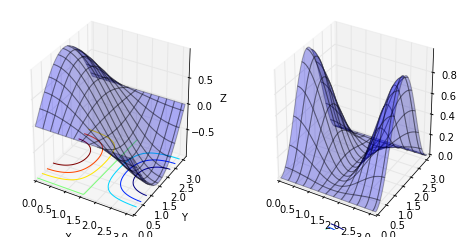

In [6]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.constants import *
# make sure we see it on this notebook
%matplotlib inline

# Generate points on x and y axes
x = np.linspace(0, pi, 100)
y = np.linspace(0, pi, 100)
# Generate grid in the xy plane
X, Y = np.meshgrid(x, y)
# Tell matplotlib to create a figure with two panels
fig = plt.figure(figsize=plt.figaspect(0.5))
# Tell matplotlib to add axes for a plot on the left panel
ax = fig.add_subplot(1, 2, 1, projection='3d')
# Generate function values for the first plot
Z = (np.sin(X)*np.cos(Y)).T
max_val = np.max(Z)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
# Contour plots on the xy plane
cset = ax.contour(X, Y, Z, zdir='z', offset=-max_val)

ax.set_xlabel('X')
ax.set_xlim([0, pi])
ax.set_ylabel('Y')
ax.set_ylim([0, pi])
ax.set_zlabel('Z')
ax.set_zlim(-max_val, max_val)

# Tell maplotlib to add axes for a plot on the right panle
ax = fig.add_subplot(1, 2, 2, projection='3d')
Z1 = ((np.sin(X)*np.cos(Y)).T)**2
max_val = np.max(Z1)
ax.plot_surface(X, Y, Z1, rstride=8, cstride=8, alpha=0.3)
# Contour plots on the xy plane
cset = ax.contour(X, Y, Z1, zdir='z', offset=-max_val)

## Exercise 2: Eigenfunction or not?

Given the following linear combinations of two-dimensional eigenfunctions:
\begin{equation}
\begin{aligned}
\psi_a(x, y) &= \psi_{11}(x, y) + \psi_{22}(x, y) \\
\psi_b(x, y) &= \psi_{11}(x, y) - \psi_{22}(x, y) \\
\psi_c(x, y) &= \psi_{23}(x, y) + \psi_{32}(x, y) \\
\psi_d(x, y) &= \psi_{23}(x, y) - \psi_{32}(x, y) \\
\end{aligned}
\end{equation}
Are these eigenfunctions of the two-dimensional particle in a box Hamiltonian when the box is rectangular ($L_x\neq L_y$)? What happens when the box is square ($L_x = Ly$)?
Normalize all the linear combinations and plot them, together with their probability distributions.

## Exercise 3: Hybridization

The eigenfunctions for the particle in a square box can be used to visualize orbitals similar to the $sp$ and $sp^2$ hybridized orbitals, as explained [here].
Hybridized orbitals are linear combinations of eigenfunctions for a given problem that exhibit a peculiar structure of the probability density.
Plot the wavefunctions and probability densities for the following linear combinations:
\begin{equation}
\Psi(x, y) = \psi_{11}(x, y) + \psi_{21}(x, y) \quad\quad \Psi(x, y) = \psi_{11}(x, y) - \psi_{21}(x, y)
\end{equation}


[here]: http://pubs.acs.org/doi/abs/10.1021/ed067p866